<img src="logoucm.png" style="height: 100px">
<center style="color:#888">Big Data<br/></center>


<h1><center>Calidad del aire en la Comunidad de Madrid</center></h1>

# Introducción

Los datos empleados en este trabajo son datos recogidos de forma diaria desde 2010 hasta 2023 por la Comunidad de Madrid sobre la concentración de diferentes contaminantes en 24 estaciones repartidas por todo su territorio. Estos datos son publicado diariamente en su página web <a href="https://airedemadrid.madrid.es/portal/site/calidadaire">Portal de Calidad del aire</a>, así como un **Índice de Calidad del Aire** que tiene como objetivo dar una valoración de los efectos de la contaminación atmosférica sobre la salud.

Se puede obtener más información de las variables recogidas en el <a href="http://localhost:8888/tree/OneDrive/Escritorio/CALIDAD%20AIRE%20MADRID">Interprete fichero</a>.
Se presenta una breve descripción de los datos recogidos.


| Atributo | Descripción |
| :- |:- |
|**PROVINCIA**| Identificador de la provincia (en este caso siempre '28'-Madrid)|
|**MUNICIPIO**| Identificador del municipio (en este caso siempre '79'-Mardrid|
|**ESTACION**| Identificador de la estación de recogida de los contaminantes|
|**MAGNITUD**| Identificador del contaminante|
|**PUNTO MUESTREO**| Identificador del punto de muestro|
|**ANO**| Año de recogida del dato|
|**MES**| Mes de recogida el dato|
|**D01**| D0_X_ indica el día del mes|
|**V01**| V0_X_ indica si el dato está verificado o no (Sí: "V", NO: "N")|

# Librerías

In [1]:
# Librerias 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Análisis Exploratorio de los Datos

## 1.1 Limpieza de la base de datos

En primer lugar, abrimos el fichero con los datos y estudiamos la dimensión y estructura de los mismos. 

In [2]:
# Cargamos los datos
df = pd.read_csv("datos_total.csv", delimiter = ",")
df.head(5)

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,0,28,79,4,1,28079004_1_38,2010,1,12.0,V,...,16.0,V,21.0,V,22.0,V,17.0,V,15.0,V
1,1,28,79,4,1,28079004_1_38,2010,2,18.0,V,...,15.0,V,13.0,V,0.0,N,0.0,N,0.0,N
2,2,28,79,4,1,28079004_1_38,2010,3,13.0,V,...,14.0,V,16.0,V,15.0,V,13.0,V,14.0,V
3,3,28,79,4,1,28079004_1_38,2010,4,14.0,V,...,9.0,V,9.0,V,9.0,V,9.0,V,0.0,N
4,4,28,79,4,1,28079004_1_38,2010,5,8.0,V,...,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V


In [3]:
# Numero de obeservaciones y de variables
df.shape

(21633, 70)

Tenemos 21633 registros de 70 variables, aunque eliminamos las variables ***provoncia*** y ***municipio*** por ser redundantes. 

In [4]:
# Variables
df = df.drop(columns=['Unnamed: 0', 'PROVINCIA', 'MUNICIPIO'], axis = 1)

En primer lugar, vamos a tratar con el problema de los datos no verificados. Sólo son validos aquellos datos acompañados de un código de verificación *V*.

El estudio que vamos a realizar crea un índice a partir de ciertos compuestos (<a href="https://airedemadrid.madrid.es/portales/calidadaire/es/Bases-de-datos-y-publicaciones/Bases-de-datos-de-calidad-del-aire/Indices-y-zonas/Indice-de-calidad-del-aire/?vgnextfmt=default&vgnextoid=303d635a41187710VgnVCM1000001d4a900aRCRD&vgnextchannel=480285a1259d7710VgnVCM2000001f4a900aRCRD">Índice de Calidad del Aire</a>). Por ello, vamos a seleccionar las magnitudes que nos interesan reduciendo así la dimensionalidad del problema.

*Los compuestos que se emplean para calcular el índice de calidad son las partículas en suspensión (PM10 y PM2,5), dióxido de azufre, dióxido de nitrógeno y ozono. Para cada uno de estos contaminantes se establece un índice parcial, de forma que el peor valor de los cinco definirá el índice global y, por lo tanto, la calidad del aire en el municipio de Madrid.*

| Contaminantes | id| Muy bueno | Bueno | Regular | Malo | Muy malo |
| :- |:- |:-|:-|:-|:-| :-|
|Partículas PM2,5| 9| 0-15|16-30|31-55|56-110|>110|
|Partículas PM10| 10| 0-25|26-50|51-90|91-180|>180|
|NO2| 8| 0-50|51-100|101-200|201-400|>400|
|O3| 14|0-60|61-120|121-180|181-240|>240|
|SO2| 1|0-50|51-100|101-350|351-500|>500|

Por tanto, nos quedamos con los registros de los contaminantes que conforman el índice previamente definido.

In [5]:
# DataFrame con los contaminantes de interes
df_contaminantes = df[(df['MAGNITUD'] == 9) | (df['MAGNITUD'] == 10) | 
                      (df['MAGNITUD'] == 8) | (df['MAGNITUD'] == 14) |
                      (df['MAGNITUD'] == 1)]
df_contaminantes.head(5)

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,28079004_1_38,2010,1,12.0,V,15.0,V,17.0,...,16.0,V,21.0,V,22.0,V,17.0,V,15.0,V
1,4,1,28079004_1_38,2010,2,18.0,V,20.0,V,24.0,...,15.0,V,13.0,V,0.0,N,0.0,N,0.0,N
2,4,1,28079004_1_38,2010,3,13.0,V,15.0,V,13.0,...,14.0,V,16.0,V,15.0,V,13.0,V,14.0,V
3,4,1,28079004_1_38,2010,4,14.0,V,14.0,V,13.0,...,9.0,V,9.0,V,9.0,V,9.0,V,0.0,N
4,4,1,28079004_1_38,2010,5,8.0,V,8.0,V,8.0,...,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V


In [6]:
dias = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
       'D11','D12','D13','D14','D15','D16','D17','D18','D19','D20',
       'D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']

verf = ['V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
       'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
       'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31']

In [7]:
# Dias 
df_dias = df_contaminantes.melt(id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES'],
                                value_vars = dias,
                                var_name = 'DIA',
                                value_name = 'VALOR')
# Verificaciones
df_verf= df_contaminantes.melt(id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES'],
                               value_vars = verf,
                               var_name = 'VER',
                               value_name = 'VV')

df_dias['VV'] = df_verf['VV']
df1 = df_dias

Con este dataframe, vamos a diferencias entre los valores no verificados (aquellos que van seguidos de un 'N') y los valores no medidos por no existir el día en concreto (p.e, 30-02).

En primer lugar, eliminamos del dataframe aquellos días que no existen. 

In [8]:
date_str = df1['ANO'].astype(str) + '-' + df1['MES'].astype(str) + '-' + df1['DIA'].str.replace('D', '').astype(str)
df1['date'] = pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
df1 = df1.dropna(subset=['date'])
df1 = df1.sort_values(['ESTACION','MAGNITUD','date'])

In [9]:
df1

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,VALOR,VV,date
0,4,1,28079004_1_38,2010,1,D01,12.0,V,2010-01-01
9486,4,1,28079004_1_38,2010,1,D02,15.0,V,2010-01-02
18972,4,1,28079004_1_38,2010,1,D03,17.0,V,2010-01-03
28458,4,1,28079004_1_38,2010,1,D04,16.0,V,2010-01-04
37944,4,1,28079004_1_38,2010,1,D05,16.0,V,2010-01-05
...,...,...,...,...,...,...,...,...,...
256121,60,14,28079060_14_6,2021,12,D27,52.0,V,2021-12-27
265607,60,14,28079060_14_6,2021,12,D28,42.0,V,2021-12-28
275093,60,14,28079060_14_6,2021,12,D29,19.0,V,2021-12-29
284579,60,14,28079060_14_6,2021,12,D30,9.0,V,2021-12-30


En segundo lugar, vamos a poner a valor NaN los datos no verificados para posteriormente realizar una imputación de esos valores.

In [10]:
df1.loc[df1['VV'] != 'V', 'VALOR'] = np.nan

In [11]:
# Comprobamos los valores nulos
df1.isnull().sum()

ESTACION             0
MAGNITUD             0
PUNTO_MUESTREO       0
ANO                  0
MES                  0
DIA                  0
VALOR             3920
VV                   0
date                 0
dtype: int64

In [12]:
# Comprobamos filas duplicadas
df1.duplicated().sum()

0

## 1.2 Imputación de missing

Para la imputación de missing utilizamos la técnica de interpolación, lineal, en nuestro caso.

**Nota:** Explicar interpolación

**Interpolación**

In [13]:
df1['VALOR'].interpolate(inplace=True)
df1 = df1.drop(['VV'],axis=1)

## 1.3 Estadísticos descriptivos

Creamos dataframe con las magnitudes y otro por zonas.

**Por magnitudes**

In [14]:
# Creamos el DataFrame con el que haremos las series temporales de los contaminantes
df_magnitudes = df1.pivot_table(index=['ESTACION', 'ANO', 'MES', 'DIA', 'date'], columns='MAGNITUD', values='VALOR')
df_magnitudes = df_magnitudes.reset_index()
df_magnitudes.columns = ['ESTACION','ANO','MES','DIA','date','SO2', 'NO2', 'PM2.5', 'PM10','O3']
df_magnitudes

,ESTACION,ANO,MES,DIA,date,SO2,NO2,PM2.5,PM10,O3
0,4,2010,1,D01,2010-01-01,12.0,12.0,NaN,NaN,NaN
1,4,2010,1,D02,2010-01-02,15.0,40.0,NaN,NaN,NaN
2,4,2010,1,D03,2010-01-03,17.0,51.0,NaN,NaN,NaN
3,4,2010,1,D04,2010-01-04,16.0,53.0,NaN,NaN,NaN
4,4,2010,1,D05,2010-01-05,16.0,46.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
104883,60,2021,12,D27,2021-12-27,NaN,13.0,NaN,6.0,52.0
104884,60,2021,12,D28,2021-12-28,NaN,19.0,NaN,5.0,42.0
104885,60,2021,12,D29,2021-12-29,NaN,36.0,NaN,9.0,19.0
104886,60,2021,12,D30,2021-12-30,NaN,44.0,NaN,8.0,9.0


**Nota:** Para poder ajustar una serie temporal, agrupamos por estación y damos a cada contaminante en cada día la media del valor que se haya recogido en las diferentes estaciones.

In [15]:
ts_magnitudes = df_magnitudes.groupby('date').mean()
ts_magnitudes.head(5)

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3
date,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.9,20.521212,7.00,17.248571,53.929825
2010-01-02,36.727273,2010.0,1.0,9.5,39.996970,10.00,21.097143,25.645363
2010-01-03,36.727273,2010.0,1.0,11.6,50.518182,12.25,22.045714,12.789474
2010-01-04,36.727273,2010.0,1.0,11.6,52.221212,9.00,16.394286,13.505013
2010-01-05,36.727273,2010.0,1.0,11.9,46.469697,8.00,18.142857,21.863409


**Por zonas**

In [16]:
# Creamos el DataFrame con el que haremos las series temporales por zonas
df_zonas = df1.pivot_table(index=['MAGNITUD', 'ANO', 'MES', 'DIA'], columns='ESTACION', values='VALOR')
df_zonas = df_zonas.reset_index()
df_zonas.head(5)

ESTACION,MAGNITUD,ANO,MES,DIA,4,8,11,16,17,18,...,48,49,50,54,55,56,57,58,59,60
0,1,2010,1,D01,12.0,9.0,NaN,NaN,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1,1,2010,1,D02,15.0,10.0,NaN,NaN,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
2,1,2010,1,D03,17.0,11.0,NaN,NaN,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
3,1,2010,1,D04,16.0,12.0,NaN,NaN,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
4,1,2010,1,D05,16.0,12.0,NaN,NaN,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


## 1.4 Outliers

Vamos a estudiar los outliers por magnitud.

In [17]:
so2 = ts_magnitudes['SO2']
no2 = ts_magnitudes['NO2']
pm25 = ts_magnitudes['PM2.5']
pm10 = ts_magnitudes['PM10']
o3 = ts_magnitudes['O3']

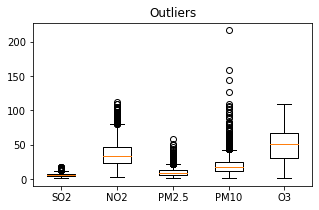

In [18]:
# Boxplot
magnitudes = [so2, no2, pm25, pm10, o3]
fig = plt.figure(figsize=(5,3))
plt.boxplot(magnitudes)
plt.xticks([1,2,3,4,5], ['SO2','NO2', 'PM2.5','PM10','O3'])
plt.title('Outliers')
plt.show()

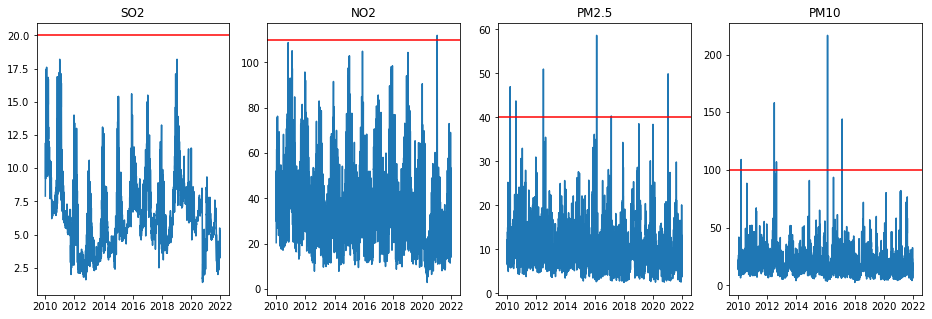

In [19]:
plt.figure(plt.figure(figsize=(20,5)))
plt.subplot(151);plt.plot(so2);plt.axhline(y=20, color='red');plt.title('SO2')
plt.subplot(152);plt.plot(no2);plt.axhline(y=110, color='red');plt.title('NO2')
plt.subplot(153);plt.plot(pm25);plt.axhline(y=40, color='red');plt.title('PM2.5')
plt.subplot(154);plt.plot(pm10);plt.axhline(y=100, color='red');plt.title('PM10')
plt.show()

Imputamos los valores outliers mediante interpolacion

In [ ]:
#ts_magnitudes.loc[no2[no2>110].index[0], 'NO2'] = np.nan
#ts_magnitudes.loc[pm25[pm25>35].index[0], 'PM2.5'] = np.nan
#ts_magnitudes.loc[pm10[pm10 > 10].index[0], 'PM10'] = np.nan

In [ ]:
#ts_magnitudes['NO2'].interpolate(inplace=True)
#ts_magnitudes['PM2.5'].interpolate(inplace=True)
#ts_magnitudes['PM10'].interpolate(inplace=True)

# 2. Índice de Calidad del Aire

Vamos a crear un índice de calidad del aire. Así, para cada magnitud determinamos el indice de la forma descrita al principio.

| Contaminantes | id| Muy bueno | Bueno | Regular | Malo | Muy malo |
| :- |:- |:-|:-|:-|:-| :-|
|Partículas PM2,5| 9| 0-15|16-30|31-55|56-110|>110|
|Partículas PM10| 10| 0-25|26-50|51-90|91-180|>180|
|NO2| 8| 0-50|51-100|101-200|201-400|>400|
|O3| 14|0-60|61-120|121-180|181-240|>240|
|SO2| 1|0-50|51-100|101-350|351-500|>500|

In [20]:
# Indice para S02
# Definimos los rangos
bins = [0,50,100,350,500,float("inf")]
labels = [1,2,3,4,5]
# Creamos una columna con el indice
ts_magnitudes["I1"] = pd.cut(ts_magnitudes["SO2"], bins=bins, labels=labels)

# Indice para N02
bins = [0,50,100,200,400,float("inf")]
ts_magnitudes["I2"] = pd.cut(ts_magnitudes["NO2"], bins=bins, labels=labels)

# Indice para PM2.5
bins = [0,15,30,55,110,float("inf")]
ts_magnitudes["I3"] = pd.cut(ts_magnitudes["PM2.5"], bins=bins, labels=labels)

# Indice para PM10
bins = [0,25,50,90,180,float("inf")]
ts_magnitudes["I4"] = pd.cut(ts_magnitudes["PM10"], bins=bins, labels=labels)

# Indice para O3
bins = [0,60,120,180,240,float("inf")]
ts_magnitudes["I5"] = pd.cut(ts_magnitudes["O3"], bins=bins, labels=labels)

Así, obtenemos el siguiente DataFrame con las columnas de los índices de cada contaminante

In [21]:
ts_magnitudes.head(10)

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3,I1,I2,I3,I4,I5
date,,,,,,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.9,20.521212,7.00,17.248571,53.929825,1,1,1,1,1
2010-01-02,36.727273,2010.0,1.0,9.5,39.996970,10.00,21.097143,25.645363,1,1,1,1,1
2010-01-03,36.727273,2010.0,1.0,11.6,50.518182,12.25,22.045714,12.789474,1,2,1,1,1
2010-01-04,36.727273,2010.0,1.0,11.6,52.221212,9.00,16.394286,13.505013,1,2,1,1,1
2010-01-05,36.727273,2010.0,1.0,11.9,46.469697,8.00,18.142857,21.863409,1,1,1,1,1
2010-01-06,36.727273,2010.0,1.0,9.7,33.081818,7.25,17.091429,34.507519,1,1,1,1,1
2010-01-07,36.727273,2010.0,1.0,9.2,33.784848,6.50,13.640000,34.508772,1,1,1,1,1
2010-01-08,36.727273,2010.0,1.0,9.5,29.760606,7.25,18.488571,52.081454,1,1,1,1,1
2010-01-09,36.727273,2010.0,1.0,9.2,32.463636,7.25,15.737143,44.011278,1,1,1,1,1


Para crear un índice general, realizamos un PCA en las variables que indican índice.

**Nota:** Explicar teoría breve de PCA y Kernel PCA

**PCA**

In [22]:
# Librerias
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [23]:
# Indices a los que vamos a aplicar el PCA
indices = ['I1','I2','I3','I4','I5']
# Creamos el objeto
pca = PCA()

# Hiperpametro para el numero de componentes 
parametros = {'n_components': list(range(1, 6))}

# Definimos la búsqueda + CV
cv = GridSearchCV(pca, parametros, cv=5, n_jobs=-1)
cv.fit(ts_magnitudes[indices])

# Resultados
print("Mejor número de componentes: ", cv.best_params_['n_components'])
print("Varianza explicada por cada componente: ", cv.best_estimator_.explained_variance_ratio_)

Mejor número de componentes:  3
Varianza explicada por cada componente:  [0.47668767 0.31678396 0.131101  ]


Como la varianza explicada total con las 2 primeras componentes es e casi un $80\%$, decidimos quedarnos con 2 componentes.

Graficamos el PCA con 2 componentes

In [24]:
# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ts_magnitudes[indices])

# Grafico de la trasnformacion del pca a 2 variables


Creamos el indice de calidad del aire (ica). Para ello, utilizamos la matriz de cargas (*loadings matrix*) que nos da los pesos de los coeficientes de las variables originales en la combinación lineal dada por las componentes principales. Estos pesos representan la contribuciñon de cada variable a la formación de la componente principal.

In [25]:
# Martiz de carga
cargas = pca.components_

# Creamos el indice calidad del aire
ICA = np.dot(ts_magnitudes[indices],cargas.T)
ICA = ICA.mean(axis=1)

ts_magnitudes['ICA'] = ICA
ts_magnitudes

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3,I1,I2,I3,I4,I5,ICA
date,,,,,,,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.90,20.521212,7.000,17.248571,53.929825,1,1,1,1,1,1.253594
2010-01-02,36.727273,2010.0,1.0,9.50,39.996970,10.000,21.097143,25.645363,1,1,1,1,1,1.253594
2010-01-03,36.727273,2010.0,1.0,11.60,50.518182,12.250,22.045714,12.789474,1,2,1,1,1,1.338135
2010-01-04,36.727273,2010.0,1.0,11.60,52.221212,9.000,16.394286,13.505013,1,2,1,1,1,1.338135
2010-01-05,36.727273,2010.0,1.0,11.90,46.469697,8.000,18.142857,21.863409,1,1,1,1,1,1.253594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,39.217391,2021.0,12.0,3.25,14.130435,3.750,7.846154,53.000000,1,1,1,1,1,1.253594
2021-12-28,39.217391,2021.0,12.0,3.50,21.608696,4.750,10.538462,45.230769,1,1,1,1,1,1.253594
2021-12-29,39.217391,2021.0,12.0,4.00,40.913043,11.500,19.307692,18.538462,1,1,1,1,1,1.253594


**Kernel PCA**

In [26]:
# Librerias
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

In [ ]:
# Columnas a las que aplicamos Kernel PCA
#indices = df_comp_mag[['I1','I2','I3','I4','I5']]

# Creamos el objeto
#kpca = KernelPCA()

#rango_gamma = np.linspace(0, 1, 10)
#ks = list(range(1,6))

# Hiperparametros para GridSearchCV
#h_parametros = {'kpca_gamma': rango_gamma,
#    'num_comp': ks}

# Definimos la búsqueda + CV, con la métrica a optimizar
#cv = GridSearchCV(kpca, h_parametros, cv=5, n_jobs=-1, scoring = 'r2')
#cv.fit(indices)

#cv.best_estimator_

# 3. Predicción de la serie temporal

## 3.1 Series temporales univariantes por contaminante. Modelos ARIMA

Primero vamos a realizar una predicción de cada contaminante como series temporales univariantes. 

De estos, utilizaremos una muestra para entrenar los modelos y el resto para comparar las predicciones con los datos.

In [27]:
# Librerias
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

### 3.1.1 Contaminante: $SO_2$

Vamos a estudiar la serie temporal para el contaminante $SO_2$.

In [28]:
so2 = ts_magnitudes[['SO2']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
so2['fecha'] = fecha
so2 = so2.set_index('fecha')
so2.head()

,SO2
fecha,
2010-01-01,7.9
2010-01-02,9.5
2010-01-03,11.6
2010-01-04,11.6
2010-01-05,11.9


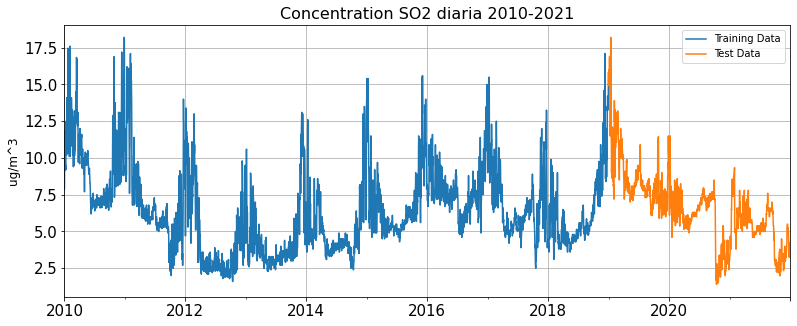

In [29]:
# Split
# Datos de entrenamiento
train_so2 = so2[(so2.index.year >= 2010) & (so2.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_so2['fecha'] = fecha
train_so2 = train_so2.set_index('fecha')
train_so2 = train_so2.asfreq('D')

# Datos de test
test_so2 = so2[(so2.index.year >= 2019) & (so2.index.year < 2022)]
fecha = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')   
test_so2['fecha'] = fecha
test_so2 = test_so2.set_index('fecha')
test_so2 = test_so2.asfreq('D')

# Grafico train-test
train_so2['SO2'].plot(figsize=(13,5),fontsize=15)
test_so2['SO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration SO2 diaria 2010-2021', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

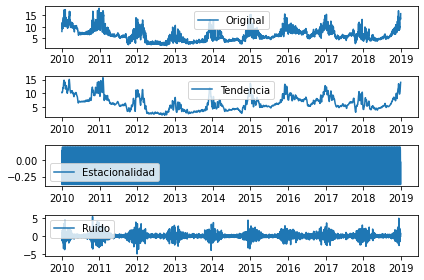

In [30]:
des = seasonal_decompose(train_so2)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Ruido')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [31]:
result = adfuller(train_so2['SO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.882876118650123
p-value: 0.0021645467661720015
Critical Values:
	1%: -3.4323587353357996
	5%: -2.8624275393930216
	10%: -2.5672424561649447


Dado que el test rechaza la hipótesis nula de que las serie sea no estacionaria, estudiamos las funciones de autocorrelación simple y parcial.

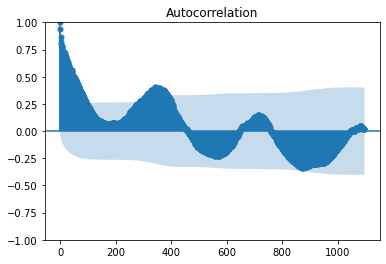

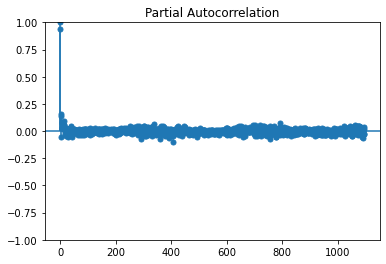

In [32]:
# FAS y FAP 
acf = plot_acf(train_so2, lags=365*3)
pacf = plot_pacf(train_so2, lags=365*3)

# Graficos
plt.show()

Como podemos ver que no hemos quitado la estacionalidad ni la tendencia de la serie, vamos a tomarla serie de forma anual, y estudiar cada año de manera independiente para así, finalmente aplicar un modelo SARIMA con estacionalidad 365.

Comenzamos con el **año 2010**

In [33]:
train_so2_1 = train_so2[(train_so2.index.year == 2010)]
train_so2_1

,SO2
fecha,
2010-01-01,7.9
2010-01-02,9.5
2010-01-03,11.6
2010-01-04,11.6
2010-01-05,11.9
...,...
2010-12-27,15.5
2010-12-28,18.2
2010-12-29,18.0


In [ ]:
# Grafico train-test
train_so2_1['SO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration SO2 diaria para 2010', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data 2010'])
plt.show()

En primer lugar, miramos las componentes de la serie

In [ ]:
des = seasonal_decompose(train_so2_1)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# Grafico de las componentes de la serie temporal
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Ruido')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Podemos ver que existe tanto tendencia como estacionalidad (que puede ser semanal). Así, estudiamos el test adf para ver si la serie es estacionaria

In [ ]:
result = adfuller(train_so2_1['SO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Como el p-valor es $p.valor > 0.05$ aceptamos la hipótesis nula de que la serie no es estacionaria. Así, realizamos una diferenciacióne estacional de frecuencia 52 (semanal) y una diferenciación simple

In [ ]:
# Diferenciacion estacional 
sdiff_so2 = train_so2_1.diff(periods=52)
# Diferenciacion simple
diff_so2 = sdiff_so2.diff()
# Grafico serie estacionaria
diff_so2['SO2'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Serie estacionaria 2010'], loc = 'best')
plt.show()

In [ ]:
diff_so2 = diff_so2['SO2'][53:]
result = adfuller(diff_so2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Ahora, rechazamos que la serie es no estacionaria y podemos estudiar las funciones de autocorrelación simple y parcial.

In [ ]:
# FAS y FAP 
plt.figure(figsize=(20,100))
acf = plot_acf(diff_so2, lags=10)  # MA tiene splikes  
pacf = plot_pacf(diff_so2, lags=15) 
# SARIMA(0,1,1)(0,1,1)_52

# Graficos
plt.show()

Queremos ajustar un modelo ARIMA basándonos en los gráficos de las funciones de autocorrelación. 

Ajustamos un modelo $SARIMA(1,1,2)\times(1,1,0)_{52}$ año 2010

In [ ]:
# Modelo
modelo1 = sm.tsa.statespace.SARIMAX(train_so2_1, order=(1,1,2), seasonal_order=(1,1,0,52*2))
resultados1 = modelo1.fit()

# Resultados
print(resultados1.summary())

**Predicciones**

Así, juntando la estacionalidad que habíamos detectado al principio junto con la estacionalidad del modelo SARIMA tenemos:
$SARIMA(,1,)\times(,1,)$

In [ ]:
test_so2_1 = train_so2[(train_so2.index.year == 2011)]

In [ ]:
predicciones = resultados1.forecast(steps=365)
predicciones = pd.Series(predicciones, index=test_so2_1.index)

# Plot actual and predicted values
plt.plot(train_so2_1, label='Entrenamiento')
plt.plot(test_so2_1, label='Test')
plt.plot(predicciones, label='Predicciones')
plt.legend()
plt.show()

### 3.1.2 Contaminante: $NO_2$

In [ ]:
no2 = ts_magnitudes[['NO2']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
no2['fecha'] = fecha
no2 = no2.set_index('fecha')
no2.head()

In [ ]:
# Split
# Datos de entrenamiento
train_no2 = no2[(no2.index.year >= 2010) & (no2.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_no2['fecha'] = fecha
train_no2 = train_no2.set_index('fecha')
train_no2 = train_no2.asfreq('D')

# Datos de test
test_no2 = no2[(no2.index.year >= 2019) & (no2.index.year < 2022)]
fecha = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')   
test_no2['fecha'] = fecha
test_no2 = test_no2.set_index('fecha')
test_no2 = test_no2.asfreq('D')

# Grafico train-test
train_no2['NO2'].plot(figsize=(13,5),fontsize=15)
test_no2['NO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration NO2 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_no2)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [ ]:
result = adfuller(train_no2['NO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Dado que el test rechaza la hipótesis nula de que las serie sea no estacionaria, estudiamos las funciones de autocorrelación simple y parcial.

In [ ]:
# FAS y FAP 
acf = plot_acf(train_no2, lags=365*2)
pacf = plot_pacf(train_no2, lags=365*2)

# Graficos
plt.show()

Como podemos ver que no hemos quitado la estacionalidad ni la tendencia de la serie, vamos a tomarla serie de forma anual, y estudiar cada año de manera independiente para así, finalmente aplicar un modelo SARIMA con estacionalidad 365.

Comenzamos con el **año 2010**

In [ ]:
train_no2_1 = train_no2[(train_no2.index.year == 2010)]
train_no2_1

In [ ]:
# Grafico train-test
train_no2_1['NO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration NO2 diaria para 2010', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data 2010'])
plt.show()

In [ ]:
des = seasonal_decompose(train_no2_1)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# Grafico de las componentes de la serie temporal
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Ruido')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

test

In [ ]:
result = adfuller(train_no2_1['NO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
# Diferenciacion estacional 
sdiff_no2 = train_no2_1.diff(periods=52)
diff_no2 = sdiff_no2.diff()
# Grafico serie estacionaria
diff_no2['NO2'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Serie estacionaria 2010'], loc = 'best')
plt.show()

In [ ]:
# FAS y FAP 
diff_no2 = diff_no2[53:]
acf = plot_acf(diff_no2, lags=30) # spike 2,3 MA(2) MA(1)
pacf = plot_pacf(diff_no2, lags=30) 

# Graficos
plt.show()

In [ ]:
# Modelo
modelo2 = sm.tsa.statespace.SARIMAX(train_no2, order=(1,1,2), seasonal_order=(0,1,1,52))
resultados2 = modelo2.fit()

# Resultados
print(resultados2.summary())

**Predicciones**

In [ ]:
test_no2_1 = train_no2[(train_no2.index.year == 2011)]

In [ ]:
predicciones = resultados2.forecast(steps=365)
predicciones = pd.Series(predicciones, index=test_so2_1.index)

# Plot actual and predicted values
plt.plot(train_no2_1, label='Entrenamiento')
plt.plot(test_no2_1, label='Test')
plt.plot(predicciones, label='Predicciones')
plt.legend()
plt.show()

### 3.1.3 Contaminante: $PM2.5$

In [ ]:
pm25 = ts_magnitudes[['PM2.5']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
pm25['fecha'] = fecha
pm25 = pm25.set_index('fecha')
pm25.head()

In [ ]:
# Split
# Datos de entrenamiento
train_pm25 = pm25[(pm25.index.year >= 2010) & (pm25.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_pm25['fecha'] = fecha
train_pm25 = train_pm25.set_index('fecha')
train_pm25 = train_pm25.asfreq('D')

# Datos de test
test_pm25 = pm25[(pm25.index.year >= 2019) & (pm25.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_pm25['fecha'] = fecha
test_pm25= test_pm25.set_index('fecha')
test_pm35 = test_pm25.asfreq('D')

# Grafico train-test
train_pm25['PM2.5'].plot(figsize=(13,5),fontsize=15)
test_pm25['PM2.5'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration PM2.5 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_pm25)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [ ]:
result = adfuller(train_pm25['PM2.5'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

In [ ]:
# FAS y FAP 
acf = plot_acf(train_pm25, lags=365*2)
pacf = plot_pacf(train_pm25, lags=365*2)

# Graficos
plt.show()

Ajustamos un modelo 

In [ ]:
# Modelo
modelo3 = sm.tsa.statespace.SARIMAX(train_pm25, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados3 = modelo3.fit()

# Resultados
print(resultados3.summary())

**Predicciones**

### 3.1.4 Contaminante: $PM_{10}$

In [ ]:
pm10 = ts_magnitudes[['PM10']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
pm10['fecha'] = fecha
pm10 = pm10.set_index('fecha')
pm10.head()

In [ ]:
# Split
# Datos de entrenamiento
train_pm10 = pm10[(pm10.index.year >= 2010) & (pm10.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_pm10['fecha'] = fecha
train_pm10 = train_pm10.set_index('fecha')
train_pm10 = train_pm10.asfreq('D')

# Datos de test
test_pm10 = pm10[(pm10.index.year >= 2019) & (pm10.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_pm10['fecha'] = fecha
test_pm10 = test_pm10.set_index('fecha')
test_pm10 = test_pm10.asfreq('D')

# Grafico train-test
train_pm10['PM10'].plot(figsize=(13,5),fontsize=15)
test_pm10['PM10'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration PM10 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_pm10)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [ ]:
result = adfuller(train_pm10['PM10'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

In [ ]:
# FAS y FAP 
acf = plot_acf(train_pm10, lags=365*2)
pacf = plot_pacf(train_pm10, lags=365*2)

# Graficos
plt.show()

Así, ajustamos un modelo SARIMA:


In [ ]:
# Modelo
modelo4 = sm.tsa.statespace.SARIMAX(train_pm10, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados4 = modelo4.fit()

# Resultados
print(resultados4.summary())

**Predicciones**

### 3.1.5 Contaminante: $O_3$

In [ ]:
o3 = ts_magnitudes[['O3']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
o3['fecha'] = fecha
o3 = o3.set_index('fecha')
o3.head()

In [ ]:
# Split
# Datos de entrenamiento
train_o3 = o3[(o3.index.year >= 2010) & (o3.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_o3['fecha'] = fecha
train_o3 = train_o3.set_index('fecha')
train_o3 = train_o3.asfreq('D')

# Datos de test
test_o3 = o3[(o3.index.year >= 2019) & (o3.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_o3['fecha'] = fecha
test_o3 = test_o3.set_index('fecha')
test_o3 = test_o3.asfreq('D')

# Grafico train-test
train_o3['O3'].plot(figsize=(13,5),fontsize=15)
test_o3['O3'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration O3 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_o3)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [ ]:
result = adfuller(train_o3['O3'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

In [ ]:
# FAS y FAP 
acf = plot_acf(train_o3, lags=365*2)
pacf = plot_pacf(train_o3, lags=365*2)

# Graficos
plt.show()

Así, ajustamos un modelo SARIMA:


In [ ]:
# Modelo
modelo5 = sm.tsa.statespace.SARIMAX(train_o3, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados5 = modelo3.fit()

# Resultados
print(resultados5.summary())

**Predicciones**